In [214]:
## _______________________________________

from pandas import read_pickle, read_csv, to_datetime, Timedelta
from obspy import UTCDateTime

import os
import matplotlib.pyplot as plt

In [2]:
## _______________________________________

if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [293]:
config = {}

config['ring'] = "Z"

config['year'] = UTCDateTime.now().year

config['path_to_data'] = data_path+"sagnac_frequency/autodata/"
config['path_to_figs'] = data_path+f"romy_plots/{config['year']}/R{config['ring']}/"


In [254]:
def __makeplot_overview1(df):

    from matplotlib.gridspec import GridSpec
    from numpy import nanmean, nanmedian
    
    def __smooth(y, box_pts):
        from numpy import ones, convolve, hanning

#         win = ones(box_pts)/box_pts
        win = hanning(box_pts)
        y_smooth = convolve(y, win/sum(win), mode='same')

        return y_smooth
    
    
    time_scaling, time_unit = 1, "MJD"
    
    ## ___________________
    ##
    
    NN = 9
    font = 14
    smooting = 5
    cut_off = int(smooting/2)  
    
    
#     fig, ax = plt.subplots(NN, 1, figsize=(15,10), sharex=True)
#     plt.subplots_adjust(hspace=0.05)
    
    fig = plt.figure(figsize=(14,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0:2, :])
    
    ax2 = fig.add_subplot(gs[2, :])
    ax3 = fig.add_subplot(gs[3, :])
    ax4 = fig.add_subplot(gs[4, :])
    
    ax5 = fig.add_subplot(gs[5:7, :])
    
    ax6 = fig.add_subplot(gs[7, :])
    ax7 = fig.add_subplot(gs[8, :])
        
    plt.subplots_adjust(hspace=0.1)
    
    ## Panel 1 -------------------------
    ax1.scatter(df['times_mjd']/time_scaling, df['fz'], c="tab:blue", s=7, alpha=0.4, zorder=2)
    ax1.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['fz'],smooting)[cut_off:-cut_off], "tab:blue", lw=0.5, label="FJZ", zorder=2)
    
    ax1.scatter(df['times_mjd']/time_scaling, df['f1'], c="tab:orange", s=7, alpha=0.4, zorder=2)
    ax1.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['f1'],smooting)[cut_off:-cut_off], "tab:orange", lw=0.5, label="CCW", zorder=2)
    
    ax1.scatter(df['times_mjd']/time_scaling, df['f2'], c="tab:red", s=7, alpha=0.4, zorder=2)
    ax1.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['f2'],smooting)[cut_off:-cut_off], "tab:red", lw=0.5, label="CW", zorder=2)


    ## Panel 2-4 -------------------------
    ax2.scatter(df['times_mjd']/time_scaling, df['fz'], c="tab:blue", s=7, alpha=0.4, zorder=2)
#     ax2.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['fz'],smooting)[cut_off:-cut_off], "tab:blue", lw=0.5, label="FJZ", zorder=2)
    
    ax3.scatter(df['times_mjd']/time_scaling, df['f1'], c="tab:orange", s=7, alpha=0.4, zorder=2)
#     ax3.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['f1'],smooting)[cut_off:-cut_off], "tab:orange", lw=0.5, label="CCW", zorder=2)
    
    ax4.scatter(df['times_mjd']/time_scaling, df['f2'], c="tab:red", s=7, alpha=0.4, zorder=2)
#     ax4.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['f2'],smooting)[cut_off:-cut_off], "tab:red", lw=0.5, label="CW", zorder=2)
   
        
    ## Panel 5 -------------------------
    ax5.scatter(df['times_mjd']/time_scaling, df['pz'], c="tab:blue", s=7, alpha=0.4, zorder=2)
    ax5.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['pz'],smooting)[cut_off:-cut_off], "tab:blue", lw=0.5, label="FJZ", zorder=2)
                   
    ax5.scatter(df['times_mjd']/time_scaling, df['p1'], c="tab:orange", s=7, alpha=0.4, zorder=2)
    ax5.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['p1'],smooting)[cut_off:-cut_off], "tab:orange", lw=0.5, label="CCW", zorder=2)
    
    ax5.scatter(df['times_mjd']/time_scaling, df['p2'], c="tab:red", s=7, alpha=0.4, zorder=2)
    ax5.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['p2'],smooting)[cut_off:-cut_off], "tab:red", lw=0.5, label="CW", zorder=2)
                  
        
    ## Panel 6 -------------------------
    ax6.scatter(df['times_mjd']/time_scaling, df['ac_z'], c="tab:green", s=7, alpha=0.4, zorder=2)
    ax6.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['ac_z'],smooting)[cut_off:-cut_off], "tab:green", lw=0.5, label="AC", zorder=2)
       
    ax6.scatter(df['times_mjd']/time_scaling, df['dc_z'], c="tab:pink", s=7, alpha=0.4, zorder=2)
    ax6.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['dc_z'],smooting)[cut_off:-cut_off], "tab:pink", lw=0.5, label="DC", zorder=2)
       
        
        
    ## Panel 7 -------------------------
    ax7.scatter(df['times_mjd']/time_scaling, df['contrast_z'], c="tab:purple", s=7, alpha=0.4, zorder=2)
    ax7.plot(df['times_mjd'][cut_off:-cut_off]/time_scaling, __smooth(df['contrast_z'],smooting)[cut_off:-cut_off], "tab:purple", lw=0.5, label="FJZ", zorder=2)
         
        
        
    ax5.set_yscale("log")
    
    ax2.set_ylim(0.99999*nanmedian(df.fz), 1.00001*nanmedian(df.fz))
    ax3.set_ylim(0.99998*nanmedian(df.fz), 1.00002*nanmedian(df.fz))
    ax4.set_ylim(0.99998*nanmedian(df.fz), 1.00002*nanmedian(df.fz))
    ax2.set_ylim(df.fz.mean()-df.fz.std(), df.fz.mean()+df.fz.std())
    ax3.set_ylim(df.fz.mean()-df.f1.std(), df.fz.mean()+df.f1.std())
    ax4.set_ylim(df.fz.mean()-df.f2.std(), df.fz.mean()+df.f2.std())
    ax7.set_ylim(0, 3*nanmedian(df.contrast_z))
    
    ax2.ticklabel_format(useOffset=False, style='plain')
    ax3.ticklabel_format(useOffset=False, style='plain')
    ax4.ticklabel_format(useOffset=False, style='plain')
    
    
    ax1.set(xticklabels=[]) 
    ax2.set(xticklabels=[]) 
    ax3.set(xticklabels=[]) 
    ax4.set(xticklabels=[])    
    
    ax1.set_ylabel(r"Sagnac Beat (Hz)", fontsize=font)
    ax2.set_ylabel(r"FZ (Hz)", fontsize=font)
    ax3.set_ylabel(r"CW (Hz)", fontsize=font)
    ax4.set_ylabel(r"CCW (Hz)", fontsize=font)
    ax5.set_ylabel(r"max. Power (V$^2$/Hz)", fontsize=font)
    ax6.set_ylabel(r"signal(V)", fontsize=font)
    ax7.set_ylabel(r"contrast", fontsize=font)

    ax7.ticklabel_format(axis="x", useOffset=False, style='plain')
    ax7.set_xlabel("Days (MJD)", fontsize=font)
    
    ax1.set_title("ROMY-Z Sagnac Signal ", fontsize=font+1, pad=10)
    
    ax1.legend(ncol=3)
    ax5.legend(ncol=3)
    ax6.legend(ncol=2)

    for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
        ax.grid(alpha=0.8, ls=":", zorder=0)

#     plt.show();
    return fig

In [289]:
def __makeplot_overview2(df, mlti):


    N = 5
    font = 12
    ms = 5
    
    fig, ax = plt.subplots(N,1,figsize=(15,10), sharex=True)

    # plt.subplots_adjust(wspace=0.2)


    ## ______________________________

    ax[0].scatter(df.times_mjd, df.fz, c="tab:blue", label="FZ", s=ms, alpha=0.4, zorder=2)
    ax[0].scatter(df.times_mjd, df.f1, c="tab:orange", label="CCW", s=ms, alpha=0.4, zorder=2)
    ax[0].scatter(df.times_mjd, df.f2, c="tab:red", label="CW", s=ms, alpha=0.4, zorder=2)

    ax[0].ticklabel_format(useOffset=False, style='plain')
    ax[0].set_ylabel("Freq. (Hz)", fontsize=font)
    ax[0].legend(loc=1, fontsize=font-2, ncol=3, bbox_to_anchor=(1, 1.3))
    

    ## ______________________________

    ax[1].scatter(df.times_mjd, df.fz, c="tab:blue", s=ms, alpha=0.4, zorder=2)
    ax[1].scatter(df.times_mjd, df.f1, c="tab:orange", s=ms, alpha=0.4, zorder=2)
    ax[1].scatter(df.times_mjd, df.f2, c="tab:red", s=ms, alpha=0.4, zorder=2)

#     ax[1].plot(df.times_mjd, df.fz, c="tab:blue", alpha=0.4, zorder=1)
#     ax[1].plot(df.times_mjd, df.f1, c="tab:orange", alpha=0.4, zorder=1)
#     ax[1].plot(df.times_mjd, df.f2, c="tab:red", alpha=0.4, zorder=1)


    ax[1].set_ylim(df.fz.mean()-0.5*df.fz.std(), df.fz.mean()+0.5*df.fz.std())
    ax[1].ticklabel_format(useOffset=False, style='plain')
    ax[1].set_ylabel("Freq. (Hz)", fontsize=font)

    ## ______________________________

    ax[2].scatter(df.times_mjd, df.ac_z, c="tab:blue", s=ms, alpha=0.4, zorder=2)
    ax[2].scatter(df.times_mjd, df.ac_1, c="tab:orange", s=ms, alpha=0.4, zorder=2)
    ax[2].scatter(df.times_mjd, df.ac_2, c="tab:red", s=ms, alpha=0.4, zorder=2)

#     ax[2].plot(df.times_mjd, df.ac_z, c="tab:blue", alpha=0.4, zorder=1)
#     ax[2].plot(df.times_mjd, df.ac_1, c="tab:orange", alpha=0.4, zorder=1)
#     ax[2].plot(df.times_mjd, df.ac_2, c="tab:red", alpha=0.4, zorder=1)

    ax[2].set_ylim(0, 0.5)
    ax[2].set_ylabel("AC (V)", fontsize=font)

    ## ______________________________

    ax[3].scatter(df.times_mjd, df.dc_z, c="tab:blue", s=ms, alpha=0.4, zorder=2)
    ax[3].scatter(df.times_mjd, df.dc_1, c="tab:orange", s=ms, alpha=0.4, zorder=2)
    ax[3].scatter(df.times_mjd, df.dc_2, c="tab:red", s=ms, alpha=0.4, zorder=2)

#     ax[3].plot(df.times_mjd, df.dc_z, c="tab:blue", alpha=0.4, zorder=1)
#     ax[3].plot(df.times_mjd, df.dc_1, c="tab:orange", alpha=0.4, zorder=1)
#     ax[3].plot(df.times_mjd, df.dc_2, c="tab:red", alpha=0.4, zorder=1)

    ax[3].set_ylabel("DC (V)", fontsize=font)
    # ax[3].set_ylim(0, 0.1)

    ## ______________________________

    ax[4].scatter(df.times_mjd, df.contrast_z, c="tab:blue", s=ms, alpha=0.4, zorder=2)
    ax[4].scatter(df.times_mjd, df.contrast_1, c="tab:orange", s=ms, alpha=0.4, zorder=2)
    ax[4].scatter(df.times_mjd, df.contrast_2, c="tab:red", s=ms, alpha=0.4, zorder=2)

#     ax[4].plot(df.times_mjd, df.contrast_z, c="tab:blue", alpha=0.4, zorder=1)
#     ax[4].plot(df.times_mjd, df.contrast_1, c="tab:orange", alpha=0.4, zorder=1)
#     ax[4].plot(df.times_mjd, df.contrast_2, c="tab:red", alpha=0.4, zorder=1)

    ax[4].set_ylim(0, 0.5)
    ax[4].set_ylabel("Contrast (V)", fontsize=font)

    
    
    for n in range(N):
        ax[n].grid(alpha=0.8, ls=":", zorder=0)
        for p in mlti.seconds:
            ax[n].axvline(df.times_mjd[0]+p/86400, color="darkgrey", alpha=0.2, zorder=-1)
        
        
    ax[N-1].set_xlabel("Time (mjd)")
    ax[0].set_title("ROMY-Z Sagnac Signal ", fontsize=font+1, pad=10)
        
        
    return fig

In [290]:
def __makeplot_overview3(df, mlti):
    
    font = 12
    N = 3

    fig, ax = plt.subplots(N,4,figsize=(15,5), sharex=True)

    plt.subplots_adjust(wspace=0.3)

    ax[0,0].plot(df.index/60, df.fz, label="FZ")
    ax[1,0].plot(df.index/60,df.f1, label="CCW")
    ax[2,0].plot(df.index/60,df.f2, label="CW")

    ax[0,1].plot(df.index/60,df.ac_z, label="FZ")
    ax[1,1].plot(df.index/60,df.ac_1, label="CCW")
    ax[2,1].plot(df.index/60,df.ac_2, label="CW")

    ax[0,2].plot(df.index/60,df.dc_z, label="FZ")
    ax[1,2].plot(df.index/60,df.dc_1, label="CCW")
    ax[2,2].plot(df.index/60,df.dc_2, label="CW")

    ax[0,3].plot(df.index/60,df.contrast_z, label="FZ")
    ax[1,3].plot(df.index/60,df.contrast_1, label="CCW")
    ax[2,3].plot(df.index/60,df.contrast_2, label="CW")



    for n in range(3):
#         ax[n,0].set_ylim(df.fz.mean()-df.fz.std(),df.fz.mean()+df.fz.std())
#         ax[n,1].set_ylim(0,2)
#         ax[n,3].set_ylim(0, 0.5)
        ax[n,0].ticklabel_format(useOffset=False, style='plain')

        ax[n,0].set_ylabel("f (Hz)", fontsize=font)
        ax[n,1].set_ylabel("AC (V)", fontsize=font)
        ax[n,2].set_ylabel("DC (V)", fontsize=font)
        ax[n,3].set_ylabel("Contrast (V)", fontsize=font)

    for i in range(3):
        for j in range(4):
            ax[i,j].grid(zorder=0)
            ax[i,j].legend(loc=1)
            ax[i,j].set_xlim(0, 24)
            ax[N-1,j].set_xlabel("Time (hour)", fontsize=font)
            for p in mlti.seconds:
                ax[i,j].axvline(p/3600, color="salmon", alpha=0.3, zorder=-1)
        

#     plt.show();
    return fig

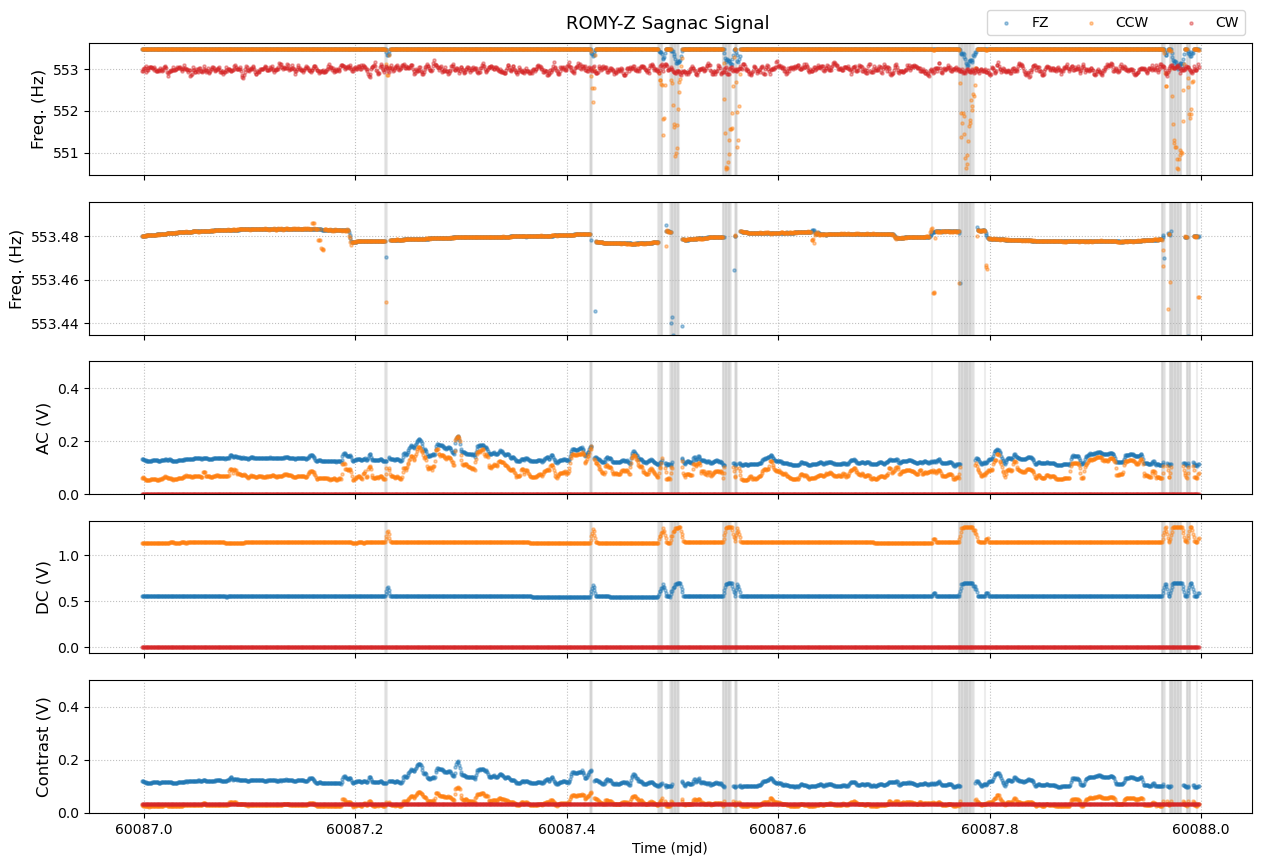

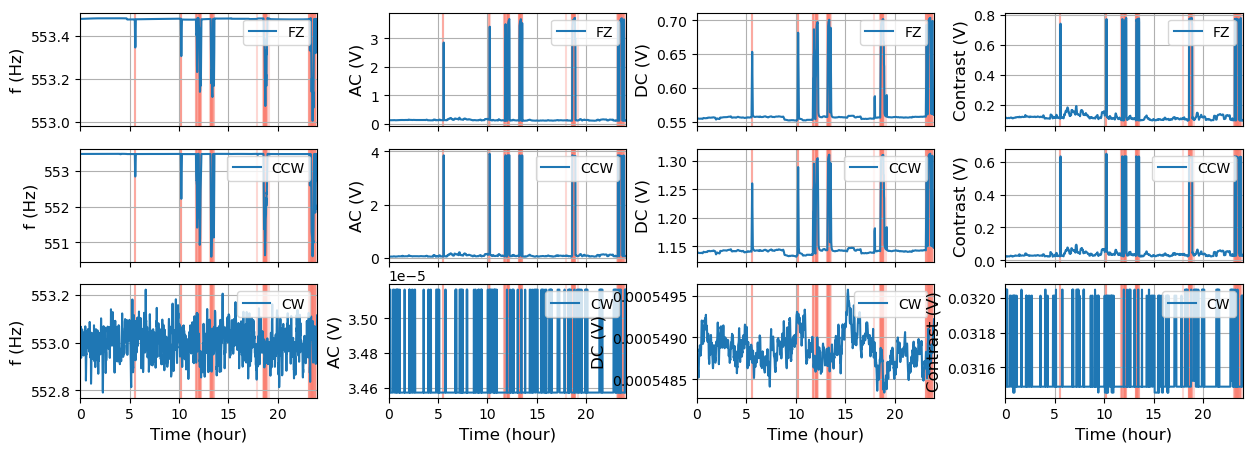

In [291]:
## current date
date = "2023-05-236"

utc_date = UTCDateTime(date)
dt_date = to_datetime(date)

## ________________________________
## read data
filename = f"FJ{config['ring']}_{date.replace('-','')}"

df = read_pickle(config['path_to_data']+filename+".pkl")

## ________________________________
## read mlti log
mlti = read_csv(archive_path+"romy_archive/2023/BW/CROMY/2023_romy_01_mlti.log", names=["datetime", "action"])

## add row with datetimes
mlti['dt'] = to_datetime(mlti.index)

## filter for current date
mlti = mlti[(mlti.dt > date) & (mlti.dt < dt_date + Timedelta(days=1))]

mlti['seconds'] = [abs(utc_date - UTCDateTime(t)) for t in mlti.dt]

## ________________________________
## create figure
# fig1 = __makeplot_overview1(df)
fig2 = __makeplot_overview2(df, mlti)
fig3 = __makeplot_overview3(df, mlti)

## ________________________________
## save figure

# filename = f"{date.replace('-','')}_signal_R{config['ring']}"

# fig1.savefig(f"{config['path_to_figs']}{filename}_1.png", dpi=200, facecolor='w', bbox_inches='tight',
#             edgecolor='w', orientation='portrait', format='png', transparent=False, pad_inches=0.1)
# fig2.savefig(f"{config['path_to_figs']}{filename}_2.png", dpi=200, facecolor='w', bbox_inches='tight',
#             edgecolor='w', orientation='portrait', format='png', transparent=False, pad_inches=0.1)
# fi3.savefig(f"{config['path_to_figs']}{filename}_3.png", dpi=200, facecolor='w', bbox_inches='tight',
#             edgecolor='w', orientation='portrait', format='png', transparent=False, pad_inches=0.1)